In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('play_golf_test.csv',sep=';')

In [3]:
df

,Outlook,Temperature Numeric,Temperature Nominal,Humidity Numeric,Humidity Nominal,Windy,Play
0,overcast,70,hot,86,high,True,no
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes
5,rainy,68,cool,80,normal,False,yes
6,rainy,65,cool,70,normal,True,no
7,rainy,75,mild,80,normal,False,yes
8,rainy,80,hot,91,high,True,no
9,sunny,85,hot,85,high,False,no


In [4]:
df.shape

(14, 7)

In [5]:
df.isna().sum()

Outlook                0
Temperature Numeric    0
Temperature Nominal    0
Humidity Numeric       0
Humidity Nominal       0
Windy                  0
Play                   0
dtype: int64

In [6]:
df['Play'] = df.Play.replace({"yes":1, "no":0})

In [7]:
df=pd.get_dummies(df,columns=['Outlook','Temperature Nominal','Humidity Nominal','Windy'])
df

,Temperature Numeric,Humidity Numeric,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature Nominal_cool,Temperature Nominal_hot,Temperature Nominal_mild,Humidity Nominal_high,Humidity Nominal_normal,Windy_False,Windy_True
0,70,86,0,1,0,0,0,1,0,1,0,0,1
1,64,65,1,1,0,0,1,0,0,0,1,0,1
2,72,90,1,1,0,0,0,0,1,1,0,0,1
3,81,75,1,1,0,0,0,1,0,0,1,1,0
4,70,96,1,0,1,0,0,0,1,1,0,1,0
5,68,80,1,0,1,0,1,0,0,0,1,1,0
6,65,70,0,0,1,0,1,0,0,0,1,0,1
7,75,80,1,0,1,0,0,0,1,0,1,1,0
8,80,91,0,0,1,0,0,1,0,1,0,0,1
9,85,85,0,0,0,1,0,1,0,1,0,1,0


In [8]:
y =df.Play
x = df.drop('Play', axis=1)

In [9]:
# y = y.flatten()

In [10]:
print(x.shape)
print(y.shape)

(14, 12)
(14,)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test= train_test_split(df,y,test_size=0.2,random_state=32)

In [13]:
x_train

,Temperature Numeric,Humidity Numeric,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature Nominal_cool,Temperature Nominal_hot,Temperature Nominal_mild,Humidity Nominal_high,Humidity Nominal_normal,Windy_False,Windy_True
12,69,70,1,0,0,1,1,0,0,0,1,1,0
9,85,85,0,0,0,1,0,1,0,1,0,1,0
1,64,65,1,1,0,0,1,0,0,0,1,0,1
10,80,90,0,0,0,1,0,1,0,1,0,0,1
4,70,96,1,0,1,0,0,0,1,1,0,1,0
3,81,75,1,1,0,0,0,1,0,0,1,1,0
8,80,91,0,0,1,0,0,1,0,1,0,0,1
6,65,70,0,0,1,0,1,0,0,0,1,0,1
5,68,80,1,0,1,0,1,0,0,0,1,1,0
11,72,95,0,0,0,1,0,0,1,1,0,1,0


In [14]:
x_train.shape

(11, 13)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler

scaler.fit(x_train)

In [15]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_hat=model.predict(x_test)
y_hat


array([0, 1, 1], dtype=int64)

In [16]:
y_test

0     0
13    1
2     1
Name: Play, dtype: int64

In [17]:
list(zip(y_hat,y_test))

[(0, 0), (1, 1), (1, 1)]

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,precision_score,recall_score,roc_curve,auc

In [19]:
confusion_matrix(y_test,y_hat)

array([[1, 0],
       [0, 2]], dtype=int64)

ax=sns.heatmap(model,annot=True,cmap='YlGnBu')
ax.set(xlabel='predicated Values',ylabel='Actual Values',title='Confusion Matrix')
ax.xaxis.set_ticklabels(['True','false'])
ax.yaxis.set_ticklabels(['True','false'])
plt.show()


<AxesSubplot:>

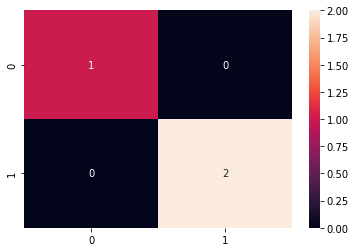

In [27]:
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True)

In [20]:
accuracy_score(y_test,y_hat)

1.0

In [21]:
precision_score(y_test,y_hat)

1.0

In [22]:
recall_score(y_test,y_hat)

1.0

In [23]:
y_prob=model.predict_proba(x_test)
y_prob

array([[9.99999990e-01, 1.04651523e-08],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

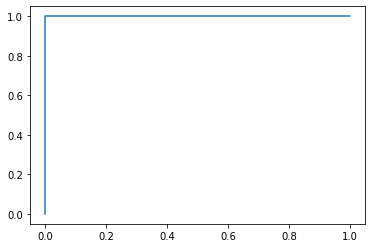

In [24]:
from sklearn.tree import plot_tree
y_prob=model.predict_proba(x_test)[:,1]
tpr,fpr,t=roc_curve(y_test,y_prob)
plt.plot(tpr,fpr,label=f'Naives(AUC={round(auc(tpr,fpr),4)})')
         